In [1]:
%load_ext autoreload
%autoreload 2

(450, 300, 3)


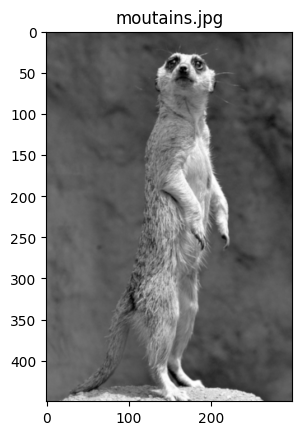

float64


In [3]:
from res.python.image import load_image, display_image
from res.python.transforms import resize
import numpy as np
import cv2

# img= load_image('./src/Self-Similarity/test_image.jpg', normalize=True)
img = cv2.imread("D:/DIP Project/Super-resolution-downstream/test_samples/meerkat_lr.png", cv2.IMREAD_COLOR)/255.0
print(img.shape)
display_image(img, 'moutains.jpg')
print(img.dtype)

(450, 300, 3)
(150, 100, 3)


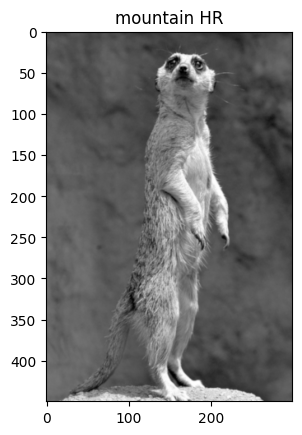

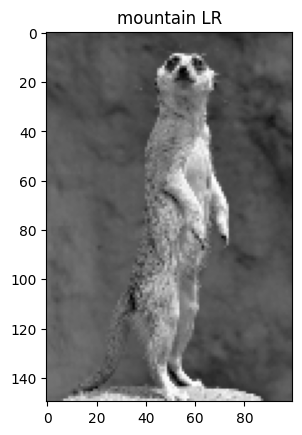

In [5]:
from res.python.transforms import quadratic_bspline

img_hr= resize(img, img.shape[:2], interp='cubic')
img_lr= resize(img, (img.shape[0]//3, img.shape[1]//3), interp='cubic')
print(img_hr.shape)
print(img_lr.shape)

display_image(img_hr, 'mountain HR')
display_image(img_lr, 'mountain LR')

In [4]:
import cv2

final_image_LR= np.astype(img_lr*255, np.uint8)
final_image_HR= np.astype(img_hr*255, np.uint8)
cv2.imwrite('./images/LR/mountain.png', cv2.cvtColor(final_image_LR, cv2.COLOR_BGR2RGB))
cv2.imwrite('./images/HR/mountain.png', cv2.cvtColor(final_image_HR, cv2.COLOR_BGR2RGB))

True

In [6]:
from res.python.self_similarity import small_SR

img_ss= img_lr.copy()
for i in range(5):
    img_ss= small_SR(img_ss, 1.25)

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 1.66 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 2.57 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 4.06 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing things...
Upscaling finished in 6.33 seconds.

Starting LSS Upscale (Strided Method)...
Step 1: Creating Image Layers...
Step 2: Initializing accumulator buffers...
Step 3: Patch details...
Step 4: Finalizing th

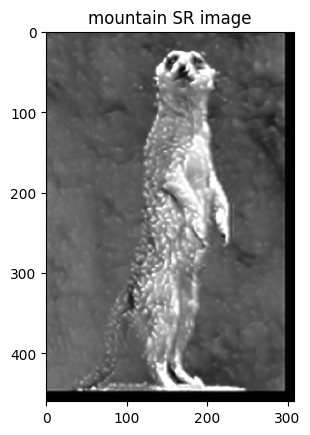

(460, 309, 3)

In [7]:
display_image(img_ss, 'mountain SR image')
img_ss.shape

In [30]:
import cv2
final_img= (np.clip(img_ss, 0.0,1.0)*255).astype(np.uint8)
cv2.imwrite('./images/SR/mountain.png', cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB))

True